In [ ]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sn
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Embedding 
from keras.models import Sequential
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
 
 
from keras.utils import to_categorical                  
from keras.layers import Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [ ]:
data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
#data_dul = data.rename(columns={'Clothing ID' : 'Clothing_ID'},inplace= False)

In [ ]:
data_dul = data.rename(columns={'Review Text':'Review_Text', 'Clothing ID' : 'Clothing_ID', 'Recommended IND' : 'Recommended_IND', 'Positive Feedback Count' : 'Positive_Feedback_Count' },inplace= False)
data_dul.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dul.dropna(subset= ['Review_Text'],inplace = True)
data_dul.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data_dul.isna().sum()

Unnamed: 0                    0
Clothing_ID                   0
Age                           0
Title                      2966
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
        return text

data_dul['Review_Text'] = data_dul['Review_Text'].apply(remove_punctuations)

In [ ]:
data_dul.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress it's sooo pretty. i happened...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data_dul['Review_Text'] = data_dul['Review_Text'].str.lower()

In [ ]:
data_dul.head()


,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress it's sooo pretty. i happened...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
['not', 'no', 'don', "don't", "didn't", 'doesn', "doesn't", 'couldn', "couldn't" ]

['not',
 'no',
 'don',
 "don't",
 "didn't",
 'doesn',
 "doesn't",
 'couldn',
 "couldn't"]

In [ ]:

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.corpus import stopwords
stop = set(nltk.corpus.stopwords.words('english'))
exclude_words = set(('not', 'no', 'don', "don't", 
                     "didn't", 'doesn', "doesn't",
                     'couldn', "couldn't", "hadn't",
                     'wasn',"aren't", 'isn', "wasn't",
                     "mightn't", 'hadn',"hasn't","wouldn't",
                     "weren't","haven't" ))
new_stop_words = stop.difference(exclude_words)
print(new_stop_words)
data_dul['Review_Text'] = data_dul['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                                  if word not in (new_stop_words )]))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"shan't", 'having', 'what', 'which', 'were', 'by', 'he', 'after', 'up', 'that', 'your', 'or', 'own', 'mightn', 'my', 'any', 'll', 'yourself', 'down', 'such', 'it', 'been', 'haven', "you're", 'about', 'these', 're', 'few', 'further', "needn't", "you'd", 'whom', 'to', 'their', 'have', 'be', 'me', "you've", 'over', 'other', 'herself', 's', 'why', 'then', 'his', "won't", 'ourselves', "that'll", 'this', "isn't", 'had', 'nor', 'y', 'its', 'has', 'through', 'than', 'they', 'who', 'aren', 'she', 'in', 'until', 'same'

In [ ]:
data_dul.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful - silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"love dress sooo pretty. happened find store, i...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,high hopes dress really wanted work me. initia...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"love, love, love jumpsuit. fun, flirty, fabulo...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie. per...,5,1,6,General,Tops,Blouses


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data_dul, test_size=0.3)

In [ ]:
train.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division Name,Department Name,Class Name
9871,9871,1089,56,Great style!,dress timeless. cute fits easily. like long sl...,5,1,1,General,Dresses,Dresses
12734,12734,1110,47,No hemming or hawing,want love dress. cute fits well...except hem t...,3,0,10,General,Dresses,Dresses
573,573,820,24,Fits so well!,"often hard time finding items fit true size, t...",5,1,0,General,Tops,Blouses
19538,19538,936,34,Cute layering option for fall,color style pretty sleeves long return it. cuf...,4,1,3,General,Tops,Sweaters
7620,7620,868,26,Purchase immediately,not think could express much love top flatteri...,5,1,3,General,Tops,Knits


In [ ]:
train.shape

(15848, 11)

In [ ]:
test.shape

(6793, 11)

In [ ]:
t = Tokenizer()
t.fit_on_texts(train.Review_Text)

print (t.word_index)

vocab_size = len(t.word_index) + 1
print (vocab_size)

{'dress': 1, 'not': 2, 'love': 3, 'size': 4, 'top': 5, 'fit': 6, 'like': 7, 'wear': 8, 'great': 9, "i'm": 10, 'would': 11, 'fabric': 12, 'small': 13, 'color': 14, 'it': 15, 'look': 16, 'really': 17, 'little': 18, 'ordered': 19, 'perfect': 20, 'one': 21, 'flattering': 22, 'well': 23, 'soft': 24, 'back': 25, 'nice': 26, 'cute': 27, 'beautiful': 28, 'bought': 29, 'comfortable': 30, 'large': 31, 'shirt': 32, 'fits': 33, 'looks': 34, 'bit': 35, 'much': 36, 'me': 37, 'material': 38, 'length': 39, 'also': 40, 'sweater': 41, 'long': 42, 'colors': 43, 'petite': 44, 'got': 45, 'jeans': 46, 'waist': 47, 'quality': 48, 'medium': 49, 'xs': 50, 'pretty': 51, 'think': 52, 'even': 53, 'work': 54, 'tried': 55, 'retailer': 56, 'store': 57, 'usually': 58, 'skirt': 59, 'good': 60, 'short': 61, 'get': 62, 'made': 63, 'way': 64, 'pants': 65, 'cut': 66, 'big': 67, 'could': 68, 'see': 69, 'still': 70, "didn't": 71, 'right': 72, "don't": 73, 'black': 74, 'super': 75, 'style': 76, 'runs': 77, 'true': 78, 'no': 

In [ ]:
x_train = t.texts_to_sequences(train.Review_Text) 
x_test = t.texts_to_sequences(test.Review_Text) 

In [ ]:
x_train_pad = pad_sequences(x_train, maxlen=500)
x_test_pad = pad_sequences(x_test, maxlen=500)

In [ ]:
 clothing_train = train['Clothing_ID']

In [ ]:
clothing_test = test['Clothing_ID']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
clothing_train = labelencoder.fit_transform(clothing_train)

In [ ]:
clothing_test=  labelencoder.fit_transform(clothing_test)

In [ ]:
recommend_train = train['Recommended_IND']

In [ ]:
recommend_test = test['Recommended_IND']

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehot = OneHotEncoder()
recommend_train = onehot.fit_transform(recommend_train.values.reshape(-1,1)).toarray()

In [ ]:
recommend_test = onehot.transform(recommend_test.values.reshape(-1,1)).toarray()

In [ ]:
age_train= train['Age']

In [ ]:
age_test = test['Age']

In [ ]:
# define standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data

scaled_train = scaler.fit_transform(age_train.values.reshape(-1,1))



In [ ]:
scaled_test = scaler.fit_transform(age_test.values.reshape(-1,1))

In [ ]:
pos_train = train['Positive_Feedback_Count']
pos_test= test['Positive_Feedback_Count']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data

scaled_train_pos = scaler.fit_transform(pos_train.values.reshape(-1,1))

In [ ]:
scaled_test_pos = scaler.fit_transform(pos_test.values.reshape(-1,1))

In [ ]:
#data_dul['Clothing_ID']= data_dul['Clothing_ID'].astype('category')

In [ ]:
data_dul.dtypes

Unnamed: 0                  int64
Clothing_ID                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
x_train=[x_train_pad, recommend_train, age_train, pos_train] #label encoding on clothing ID is done

In [ ]:
x_train[0]

array([[    0,     0,     0, ...,    52,     6,    72],
       [    0,     0,     0, ...,   219,   387,   760],
       [    0,     0,     0, ...,    17,    23,    22],
       ...,
       [    0,     0,     0, ...,     7,  1626,     5],
       [    0,     0,     0, ...,   379, 12614,   318],
       [    0,     0,     0, ...,  1353,   147,  1594]], dtype=int32)

In [ ]:
x_test= [x_test_pad, recommend_test, age_test, pos_test]

In [ ]:
x_test

[array([[   0,    0,    0, ...,    9,  134,  570],
        [   0,    0,    0, ..., 3115,    6,  950],
        [   0,    0,    0, ...,  556,  957,  206],
        ...,
        [   0,    0,    0, ...,  483,  270,   36],
        [   0,    0,    0, ...,   59,  371,  142],
        [   0,    0,    0, ...,   35,  927,  573]], dtype=int32),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 6958     37
 22548    42
 10350    41
 10902    66
 6205     43
          ..
 13613    36
 6382     40
 4415     41
 12293    40
 4638     60
 Name: Age, Length: 6793, dtype: int64,
 6958     0
 22548    0
 10350    0
 10902    0
 6205     6
         ..
 13613    0
 6382     4
 4415     0
 12293    0
 4638     1
 Name: Positive_Feedback_Count, Length: 6793, dtype: int64]

In [ ]:
y1_train= train['Rating']

In [ ]:
y1_test= test['Rating']

In [ ]:

np.unique(y1_train)

array([1, 2, 3, 4, 5])

In [ ]:
np.unique(y1_test)

array([1, 2, 3, 4, 5])

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y1_train.values.reshape(-1,1)).toarray()
 


In [ ]:
y_test = onehot.transform(y1_test.values.reshape(-1,1)).toarray()

In [ ]:
print(y_test.shape)

(6793, 5)


In [ ]:
print(y_train)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [ ]:

embeddings_index = dict()
f = open('/content/drive/My Drive/project/IFIM_Group B_Project/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

FileNotFoundError: ignored

In [ ]:
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
print (embedding_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
hidden_units = (32,4)
clothing_embedding_size = 8
age_embedding_size=8


In [ ]:
import keras
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras import regularizers
from keras.layers import concatenate

In [ ]:
#clothing_input = Input(shape=(1,), name='clothing_train')
#clothing_emb = Embedding(data_dul.Clothing_ID.max()+1, 50, input_length=1, name='clothing_emb')(clothing_input)
#clothing_out = Flatten()(clothing_emb)

In [ ]:
recommend_input =Input(shape=(2,), name='recommend_train')

age_input = Input(shape=(1,), name= 'scaled_train')
pos_input = Input(shape=(1,), name= 'pos_train')
from keras.layers import LeakyReLU

In [ ]:
#Model = Sequential()

nlp_input = Input(shape=(500,), name='x_train_pad')

emb = Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=500, trainable=True)(nlp_input)
nlp_out = LSTM(128, dropout=0.2)(emb)
x = concatenate([nlp_out, recommend_input,age_input, pos_input])
x = Dense(80, activation= 'relu')(x)
x= Dense(40, activation= 'relu')(x)
x = Dense(5, activation='softmax')(x)
model = keras.models.Model(inputs=[nlp_input, recommend_input, age_input, pos_input], outputs=[x])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              #optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_train_pad (InputLayer)        [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 50)      630750      x_train_pad[0][0]                
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 128)          91648       embedding_2[0][0]                
__________________________________________________________________________________________________
recommend_train (InputLayer)    [(None, 2)]          0                                            
_______________________________________________________________________________________

In [ ]:

model.fit(x_train,y_train,batch_size=64,epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
248/248 [==============================] - 13s 52ms/step - loss: 1.1839 - accuracy: 0.5683 - val_loss: 0.8986 - val_accuracy: 0.6189
Epoch 2/50
248/248 [==============================] - 12s 50ms/step - loss: 0.7732 - accuracy: 0.6716 - val_loss: 0.8147 - val_accuracy: 0.6296
Epoch 3/50
248/248 [==============================] - 12s 50ms/step - loss: 0.6745 - accuracy: 0.7087 - val_loss: 0.8360 - val_accuracy: 0.6446
Epoch 4/50
248/248 [==============================] - 12s 50ms/step - loss: 0.5866 - accuracy: 0.7530 - val_loss: 0.8742 - val_accuracy: 0.6395
Epoch 5/50
248/248 [==============================] - 12s 50ms/step - loss: 0.5064 - accuracy: 0.7972 - val_loss: 0.9780 - val_accuracy: 0.5987
Epoch 6/50
248/248 [==============================] - 12s 50ms/step - loss: 0.4384 - accuracy: 0.8271 - val_loss: 1.0815 - val_accuracy: 0.6170
Epoch 7/50
248/248 [==============================] - 12s 50ms/step - loss: 0.3899 - accuracy: 0.8501 - val_loss: 1.1283 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=0 )

print('Accuracy: %f' % (accuracy*100))

Accuracy: 99.716055


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0 )
print('Accuracy: %f' % (accuracy*100))

Accuracy: 58.192259


In [ ]:
print(y_test_1.shape)

(6793,)


In [ ]:
# 62% , 63% 
nlp_input = Input(shape=(500,), name='x_train_pad')

emb = Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=500, trainable=False)(nlp_input)
nlp_out = keras.layers.GlobalAveragePooling1D()(emb)
#nlp_out1 = LSTM(32, dropout=0.1)(emb)
x = concatenate([nlp_out, recommend_input,age_input, pos_input])
x = Dense(80, activation= 'relu')(x)
x= Dense(40, activation= 'relu')(x)
x = Dense(5, activation='softmax')(x)
model = keras.models.Model(inputs=[nlp_input, recommend_input, age_input, pos_input], outputs=[x])

In [ ]:
# 70%, 65%
nlp_input = Input(shape=(500,), name='x_train_pad')

emb = Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=500, trainable=False)(nlp_input)
nlp_out = LSTM(90, dropout= 0.2)(emb)
x = concatenate([nlp_out, recommend_input,age_input, pos_input])
x = Dense(80, activation= 'relu')(x)
x= Dense(40, activation= 'relu')(x)
x = Dense(5, activation='softmax')(x)
model = keras.models.Model(inputs=[nlp_input, recommend_input, age_input, pos_input], outputs=[x])

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=500, trainable=False))
model.add(LSTM(50, dropout= 0.2))

model.add(Dense(40, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              #optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 50)           630950    
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_13 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 205       
Total params: 653,395
Trainable params: 22,445
Non-trainable params: 630,950
_________________________________________________________________


In [ ]:

history=model.fit(x_train, y_train, batch_size=64, epochs=10,verbose=0,validation_data=(x_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=0, )
print('Accuracy: %f' % (accuracy*100))

Accuracy: 70.949018


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0, )
print('Accuracy: %f' % (accuracy*100))

Accuracy: 61.254233


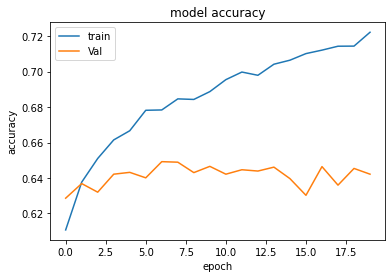

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Val'], loc='upper left')
plt.show()